<a href="https://colab.research.google.com/github/patrycjapiechowicz/Projects/blob/Predictive-Analytics/Clustering_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering


In [ ]:
import os

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

<a id="generate"></a>
## Generating Data

We'll generate some fake data using the `make_moons` function from the `sklearn.datasets` module. This function generates data points from two equations, each describing a half circle with a unique center. Since each data point is generated by one of these two equations, the cluster each data point belongs to is clear. The ideal clustering algorithm will identify two clusters and associate each data point with the equation that generated it.

In [ ]:
import sklearn; print('Scikit-Learn Version:', sklearn.__version__)
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=int(1e2), noise=0.05, random_state=0)
print(X.shape)

Scikit-Learn Version: 1.1.3
(100, 2)


Let's visualize our data:

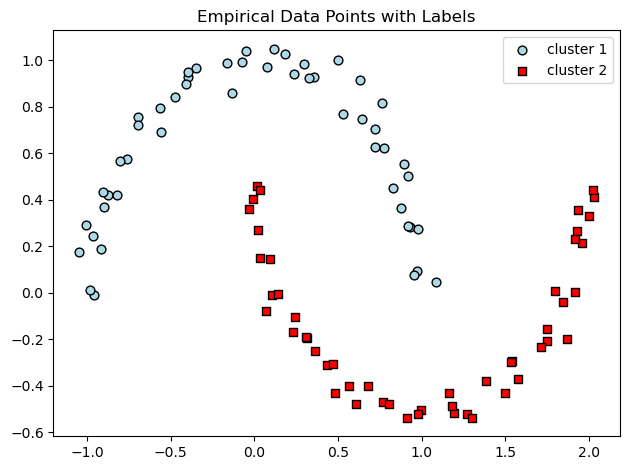

In [ ]:
# create figure
figure = plt.figure()
axis = figure.add_subplot(111)

axis.scatter(X[y == 0, 0], X[y == 0, 1], 
             edgecolor='black',
             c='lightblue', marker='o', s=40, label='cluster 1')
axis.scatter(X[y == 1, 0], X[y == 1, 1], 
             edgecolor='black',
             c='red', marker='s', s=40, label='cluster 2')
axis.set_title('Empirical Data Points with Labels')

plt.legend()
plt.tight_layout()
plt.show()

<a id="overview"></a>
## Overview of K-Means and Agglomerative Clustering

There exist several algorithms for partitioning data into partitions, two of the more common of which are called K-Means and Agglomerative Clustering.

The K-Means algorithm approaches the clustering problem by partitioning a set of data points into disjoint clusters, where each cluster is described by the mean of the samples in the cluster. The mean of the samples in a particular cluster is called a centroid; the K-Means algorithm finds the centroids and associates data points with centroids in such a way as to minimize the within-cluster sum-of-squares.

For more information on the K-Means algorithm and its implementatin in scikit-learn, check out this resource: http://scikit-learn.org/stable/modules/clustering.html#k-means

In the code cell below, we instantiate the `KMeans` algorithm from the `sklearn.cluster` module and apply it to our data using the `fit_predict` method. We see that `KMeans` identifies two centroids; one located at about (-0.23, 0.56) and the other located at (1.17, -0.05).

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
print(km.cluster_centers_)

[[ 1.17408322 -0.05027964]
 [-0.23011109  0.56790752]]


The Agglomerative Clustering algorithm behaves a little bit differently and does not identify clusters using centroids. Instead, it recursively merges the pair of clusters that minimally increases a given linkage distance. Put another way, the Agglomerative Clustering algorithm identifies the two data points that are "closest" out of all the data samples. It then takes those two data points and identifies a third data point that is "closest" to those two data points. The algorithm continues in this fashion for each data point; finding the next data point that is "closest" to the preceeding cluster of data points, where the definition of "closest" depends on the distance metric chosen.

For more information on the Agglomerative Clustering algorithm and its implementatin in scikit-learn, check out this resource: http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Below, we instantiate the `AgglomerativeClustering` algorithm from the `sklearn.cluster` module and apply it to our data.

In [ ]:
from sklearn.cluster import AgglomerativeClustering


ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)

We can visualize the results of both algorithms applied to the data. Visually, we see that neither algorithm ideally clusters our data. The ideal algorithm for this unique set of data would recognize that both sets of samples are generated from two different equations describing two different half circles.

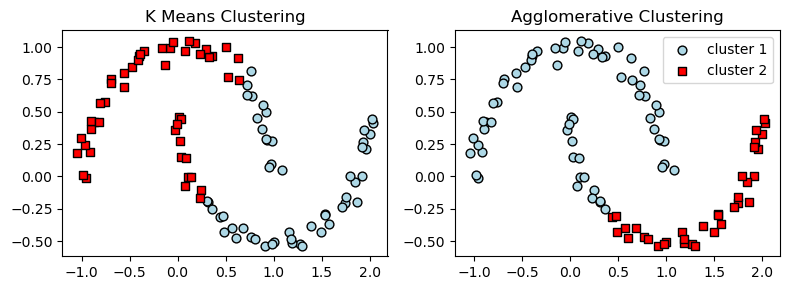

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))


ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K Means Clustering')


ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative Clustering')

plt.legend()
plt.tight_layout()
plt.show()

<a id="dbscan"></a>
## Clustering using DBSCAN

Unlike K Means or Agglomerative Clustering, DBSCAN is a density-based approach to spatial clustering. It views clusters as areas of high density separated by areas of low density. This approach has several advantages; whereas K Means focuses on finding centroids and assoicating data points with that centroid in a spherical manner, the DBSCAN algorithm can identify clusters of any convex shape. Additionally, DBSCAN is robust to areas of low density. In the above visualization, we see that Agglomerative Clustering ignores the low density space space between the interleaving circles and instead focuses on finding a clustering hierarchy that minimizes the Euclidean distance. While minimizing Euclidean distance is important for some clustering problems, it is visually apparent to a human that following the density trail of points results in the ideal clustering. 

For more information on the DBSCAN algorithm and its implementation in scikit-learn, check out this resource: http://scikit-learn.org/stable/modules/clustering.html#dbscan

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=0.2, min_samples=2)

Next, let's fit our model to the data and generate predictions.

In [ ]:
y_db = db.fit_predict(X)

Lastly, let's visualize the model applied to our data. We see that the DBSCAN algorithm correctly identifies which half-circle each data point is generated from.

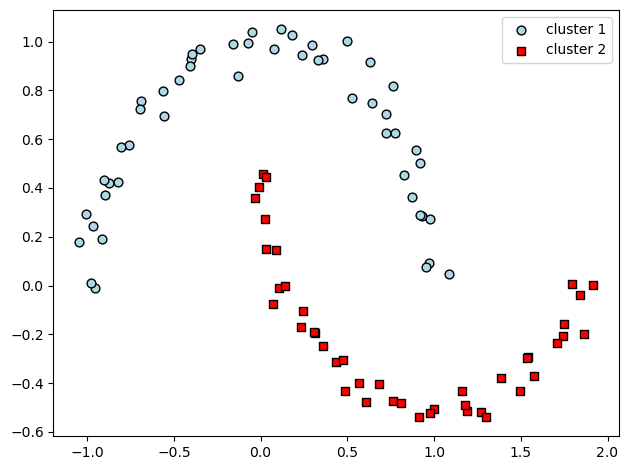

In [ ]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

<a id="accelerating"></a>
## Accelerating Clustering with RAPIDS

So how can we accelerate our code using RAPIDS? First, we cast our data to a `pandas.DataFrame` and use that to create a `cudf.DataFrame`. 

In [ ]:
import cudf; print('cuDF Version:', cudf.__version__)
import pandas as pd; print('Pandas Version:', pd.__version__)

cuDF Version: 22.10.01+2.gca9a422da9
Pandas Version: 1.5.1


In [ ]:
X_df = pd.DataFrame({'fea%d'%i: X[:, i] for i in range(X.shape[1])})
X_gdf = cudf.DataFrame.from_pandas(X_df)

cuDF Version: 22.10.01+2.gca9a422da9
Pandas Version: 1.5.1


<a id="gpukmeans"></a>
## Clustering using GPU Accelerated K-Means

Next, we load the `KMeans` class from the `cuml` package and instantiate it in the same way we did with the `sklearn.cluster.KMeans` class.

In [ ]:
from cuml.cluster import KMeans as KMeans_GPU
km_gpu = KMeans_GPU(n_clusters=2)

In [ ]:
y_km_gpu = km_gpu.fit_predict(X_gdf).to_numpy()

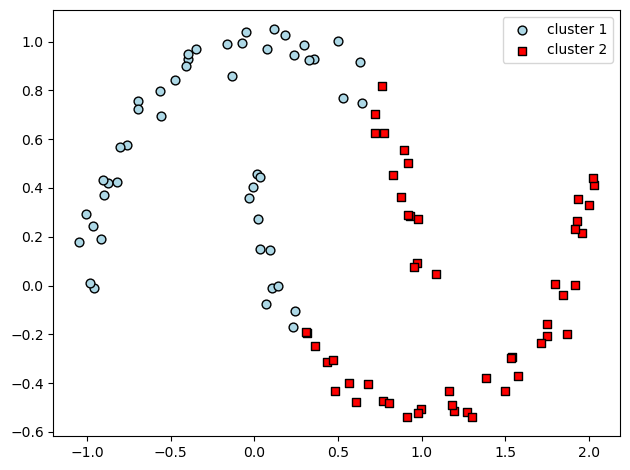

In [ ]:
plt.scatter(X[y_km_gpu == 0, 0], X[y_km_gpu == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_km_gpu == 1, 0], X[y_km_gpu == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

<a id="gpudbscan"></a>
## Clustering using GPU Accelerated DBSCAN

Next, we load the `DBSCAN` class from the `cuml` package and instantiate it in the same way we did with the `sklearn.cluster.DBSCAN` class.

In [ ]:
from cuml.cluster import DBSCAN as DBSCAN_GPU
db_gpu = DBSCAN_GPU(eps=.2,min_samples = 2)

In [ ]:
y_db_gpu = db_gpu.fit_predict(X_gdf).to_numpy()

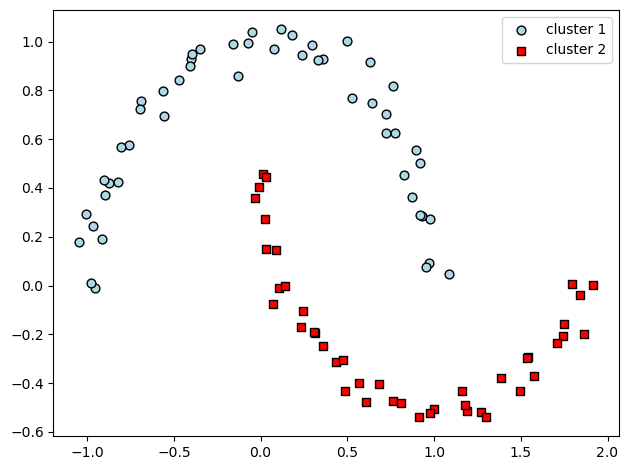

In [ ]:
plt.scatter(X[y_db_gpu == 0, 0], X[y_db_gpu == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_gpu == 1, 0], X[y_db_gpu == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

<a id="benchmarking"></a>
## Benchmarking: Comparing GPU and CPU

RAPIDS uses GPUs to parallelize operations and accelerate computations. We saw porting an example from the traditional scikit-learn interface to cuML was trivial. So how much speedup do we get from using RAPIDS? 

The answer to this question varies depending on the size and shape of the data. As a good rule of thumb, larger datasets will benefit from RAPIDS. There is overhead associated with using a GPU; data has to be transferred from the CPU to the GPU, computations have to take place on the GPU, and the results need to be transferred back from the GPU to the CPU. However, the transactional overhead of moving data back and forth from the CPU to the GPU can quickly become negligible due to the performance speedup from computing on a GPU instead of a CPU.

Feel free to change the number of rows and columns to see how this speedup might change depending on the size and shape of the data.

In [ ]:
import numpy as np; print('NumPy Version:', np.__version__)

n_rows, n_cols = 1_000_000, 128
X = np.random.rand(n_rows, n_cols)
print(X.shape)

NumPy Version: 1.23.4
(1000000, 128)


In [ ]:
X_df = pd.DataFrame({'fea%d'%i: X[:, i] for i in range(X.shape[1])})
X_gdf = cudf.DataFrame.from_pandas(X_df)

<a id="benchmarkingkmeans"></a>
## K-Means

<a id="benchmarkingkmeansgpu"></a>
### GPU

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
km_gpu = KMeans_GPU(n_clusters=2)

NameError: ignored

In [ ]:
%%time
y_km_gpu = km_gpu.fit_predict(X_gdf)

<a id="benchmarkingkmeanscpu"></a>
### CPU

In [ ]:
km = KMeans(n_clusters=2)

In [ ]:
%%time
y_km = km.fit_predict(X_df)

<a id="benchmarkingdbscan"></a>
## DBSCAN

<a id="benchmarkingdbscangpu"></a>
### GPU

In [ ]:
db_gpu = DBSCAN_GPU(eps=3, min_samples=2)

In [ ]:
%%time
y_db_gpu = db_gpu.fit_predict(X_gdf)

CPU times: user 5.24 s, sys: 2.81 s, total: 8.05 s
Wall time: 7.97 s


cuml.cluster.dbscan.DBSCAN

<a id="benchmarkingdbscancpu"></a>
### CPU

In [ ]:
db = DBSCAN(eps=3, min_samples=2)

In [ ]:
%%time
y_db = db.fit_predict(X_df)

CPU times: user 30 s, sys: 101 ms, total: 30.1 s
Wall time: 4.52 s
